## Grupo 24

### Integrantes:
#### * Idana Wagner
#### * Julieta Lopez 
#### * Franco Fernandez Achilli

In [8]:
# Importamos las librerias a utilizar
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

In [9]:
# Definimos la ruta del Dataset
path = "E:/franf/Importante/U.N.S & UPSO/Franco/UPSO/2do Año/Elementos de aprendizaje de maquina y big data/Laboratorios/LaboClustering/Crimenes.csv"
df = pd.read_csv(path)
df

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [10]:
# Realizamos un pequeño análisis exploratorio del DataFrame
max_asesinatos = df[df["Asesinatos"] == df["Asesinatos"].max()]
max_asalto = df[df["Asaltos"] == df["Asaltos"].max()]
max_violacion = df[df["Violaciones"] == df["Violaciones"].max()]
max_poblacion = df[df["Poblacion Urbana"] == df["Poblacion Urbana"].max()]

# Imprimimos en pantalla los resultados
print(f"El estado con mayor cantidad de asesinatos es: \n{max_asesinatos}\n")
print(f"El estado con mayor cantidad de asaltos es: \n{max_asalto}\n")
print(f"El estado con mayor cantidad de violaciones es: \n{max_violacion}\n")
print(f"El estado con mayor cantidad de poblacion es: \n{max_poblacion}\n")

El estado con mayor cantidad de asesinatos es: 
    Estado  Asesinatos  Asaltos  Poblacion Urbana  Violaciones
9  Georgia        17.4      211                60         25.8

El estado con mayor cantidad de asaltos es: 
            Estado  Asesinatos  Asaltos  Poblacion Urbana  Violaciones
32  North Carolina        13.0      337                45         16.1

El estado con mayor cantidad de violaciones es: 
    Estado  Asesinatos  Asaltos  Poblacion Urbana  Violaciones
27  Nevada        12.2      252                81         46.0

El estado con mayor cantidad de poblacion es: 
       Estado  Asesinatos  Asaltos  Poblacion Urbana  Violaciones
4  California         9.0      276                91         40.6



In [11]:
# Eliminamos la columna estado ya que contiene strings y genera errores a la hora de encontrar el K optimo
df_sin_estados = df
df_sin_estados.drop("Estado", axis=1, inplace=True)
df_sin_estados

,Asesinatos,Asaltos,Poblacion Urbana,Violaciones
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


e:\franf\Importante\U.N.S & UPSO\Franco\UPSO\2do Año\Elementos de aprendizaje de maquina y big data\Laboratorios\LaboClustering\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
e:\franf\Importante\U.N.S & UPSO\Franco\UPSO\2do Año\Elementos de aprendizaje de maquina y big data\Laboratorios\LaboClustering\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
e:\franf\Importante\U.N.S & UPSO\Franco\UPSO\2do Año\Elementos de aprendizaje de maquina y big data\Laboratorios\LaboClustering\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` wi

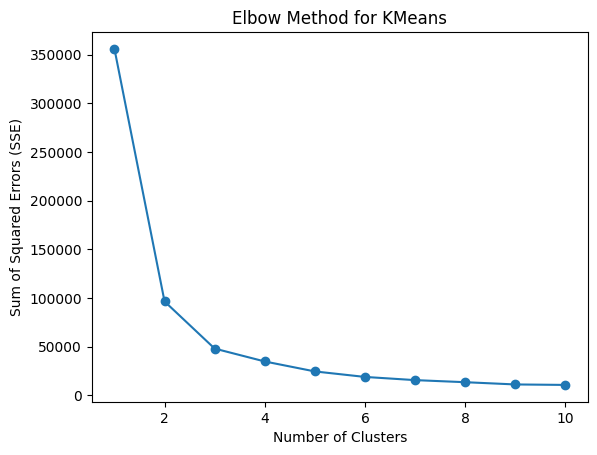

In [12]:
# Utilizamos la función vista en clase para hallar el valor k-mean óptimo
def find_optimal_clusters_kmeans(data, max_k):
    sse = [] # Suma de errores cuadrados (sum square errors)
    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k).fit(data)
        sse.append(kmeans.inertia_)

    plt.plot(range(1, max_k+1), sse, 'o-')
    plt.xlabel("Number of Clusters")
    plt.ylabel("Sum of Squared Errors (SSE)")
    plt.title("Elbow Method for KMeans")
    plt.show()

find_optimal_clusters_kmeans(df_sin_estados, 10)

e:\franf\Importante\U.N.S & UPSO\Franco\UPSO\2do Año\Elementos de aprendizaje de maquina y big data\Laboratorios\LaboClustering\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


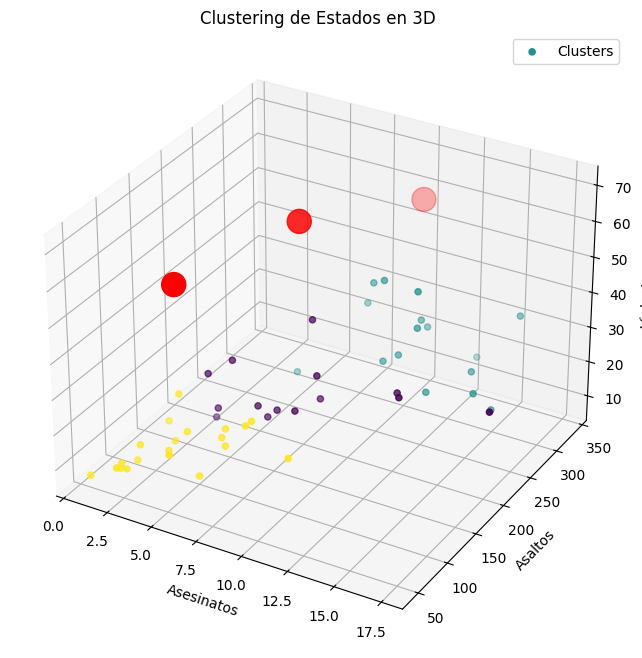

In [15]:
# Utilizamos el k optimo obtenido por el gráfico
# Utilizamos 3 para que los datos se representen de la manera más fiel posible
k_optimo = 3

# Aplicamos K-Means con el valor de k optimo obtenido (En este caso 3)
kmeans_optimizado = KMeans(n_clusters=k_optimo)
df_sin_estados['Nivel_Peligro'] = kmeans_optimizado.fit_predict(df_sin_estados)

# Visualizamos los resultados en 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df_sin_estados['Asesinatos'], df_sin_estados['Asaltos'], df_sin_estados['Violaciones'], c=df_sin_estados['Nivel_Peligro'], cmap='viridis', label='Cluster')
ax.scatter(kmeans_optimizado.cluster_centers_[:, 0], kmeans_optimizado.cluster_centers_[:, 1], kmeans_optimizado.cluster_centers_[:, 2], s=300, marker='o', c='red')

ax.set_title('Clustering de Estados en 3D')
ax.set_xlabel('Asesinatos')
ax.set_ylabel('Asaltos')
ax.set_zlabel('Violaciones')

# Agregamos una leyenda
ax.legend(handles=[scatter], labels=['Clusters'])

plt.show()

In [ ]:
# Redefinimos la variable df para incorporarle la columna Nivel_Peligro que obtuvimos en las celdas anteriores
# De este modo se puede observar el nivel de peligrosidad de cada estado
df =  pd.read_csv(path)
df["Nivel_Peligro"] = df_sin_estados["Nivel_Peligro"]
df

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones,Nivel_Peligro
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,3
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,4
7,Delaware,5.9,238,72,15.8,3
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,2


Conclusión:

#### A lo largo del laboratorio surgieron dudas respecto a la manera de interpretar los clusters obtenidos con el método KMeans, ya que al querer interpretarlos como algo binario (alta peligrosidad o baja peligrosidad) nos encontramos con que utilizando solo 2 clusters el "Elbow method" nos devolvía un valor de error cuadrático elevado, por ende optamos por interpretar cada cluster como una escala de 0 a n_clusters en nivel de peligrosidad para cada Estado, de este modo los datos cobraron más sentido. Al aalizar la grafica del elbow method hemos interpretado que la cantidad optima de clusters es 3 por lo que hemos clasificado de acuerdo a eso. Así, como se puede observar en la grafica 3D, los centroides de los clusters se identifican en color rojo mientras que los puntos mas pequeños representan los datos del dataset. Cada punto tiene un color asociado que indica su cluster de pertenencia.
#### Tambien se realizó un estudio de la documentacion de las librerías utilizadas para la correcta asignación de las variables que se utilizan como argumentos en sus métodos.